# PreProcessing Berita UAS

In [5]:
!pip install Sastrawi

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#https://raw.githubusercontent.com/SalmatulFarida/PPW/gh-pages/crawling_berita_antaranews.csv

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/SalmatulFarida/PPW/gh-pages/crawling_berita_antaranews.csv')
df

,Tanggal,Penulis,Judul,Artikel,Label
0,"Senin, 4 Desember 2023 20:01 WIB",NaN,Sembulungan dan Hinako resmi perkuat pertahana...,ANTARA - Kapal Angkatan L...,hukum
1,"Senin, 4 Desember 2023 19:57 WIB",NaN,Wamenkumham Eddy Hiariej jadi saksi dugaan men...,NaN,hukum
2,"Senin, 4 Desember 2023 19:54 WIB",Pewarta: Fianda Sjofjan RassatEditor: Tasrief ...,Eddy Hiariej ajukan praperadilan terkait penet...,Jakarta (ANTARA) - Wakil Menteri Hukum da...,hukum
3,"Senin, 4 Desember 2023 19:42 WIB",NaN,Kanwil BPN Sulsel serahkan 200 sertifikat tana...,ANTARA - Kantor Wilayah B...,hukum
4,"Senin, 4 Desember 2023 19:28 WIB",NaN,Perketat pengawasan penyelundupan BBL di Banda...,ANTARA - Kementerian Kela...,hukum
...,...,...,...,...,...
715,"Kamis, 16 November 2023 13:34 WIB",Penerjemah: Lia Wanadriani SantosaEditor: Mari...,SM Entertainment gandeng produser Inggris bent...,Jakarta (ANTARA) - Agensi SM Entertainmen...,hiburan
716,"Kamis, 16 November 2023 12:17 WIB",Penerjemah: Lia Wanadriani SantosaEditor: Mari...,"AMPERS&ONE, grup idola K-pop baru debut lewat ...",Jakarta (ANTARA) - Grup idola K-pop penda...,hiburan
717,"Kamis, 16 November 2023 12:15 WIB",NaN,Pemenang Piala Citra FFI 2023,Ajang penghargaanPiala Citra Festifal Film...,hiburan
718,"Kamis, 16 November 2023 11:08 WIB",Penerjemah: Fitra AshariEditor: Maria Rosari D...,Bradley Cooper habiskan waktu enam tahun dalam...,Jakarta (ANTARA) - Dalam mendalami perann...,hiburan


Preprocessing![cosinnes.png](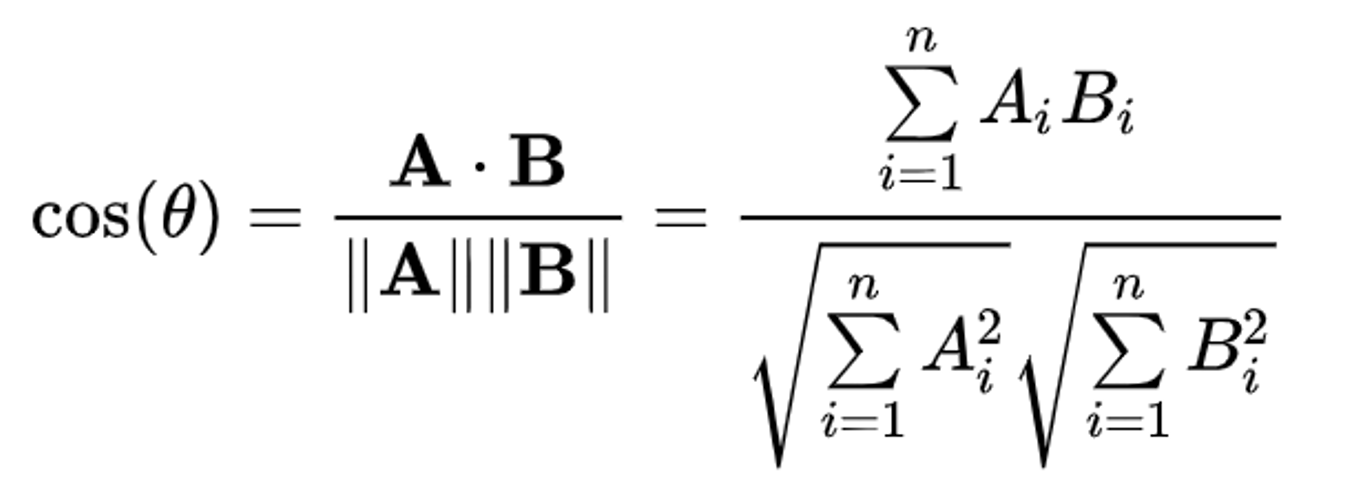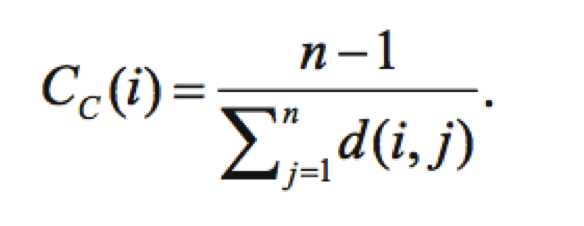)

Jumlah raw data awal setiap label

Menghitung jumlah awal data yang terdapat dalam label dan menampilkan jumlah data (baris) yang memiliki nilai tertentu pada kolom ‘Label’ dalam DataFrame df. Secara spesifik, kodingan tersebut menghitung jumlah data untuk setiap kategori, yaitu ‘Hukum’, ‘Hiburan’, dan ‘Lifestyle’, dan kemudian menampilkannya


In [8]:
count_hukum = 0
count_lifestyle= 0
count_hiburan = 0

for value in df['Label']:
  if value == 'hukum':
    count_hukum+=1
  elif value == 'lifestyle':
    count_lifestyle+=1
  else:
    count_hiburan += 1

print(
f'''
Banyak data ekonomi = {count_hukum} data
Banyak data olahraga= {count_lifestyle} data
Banyak data politik = {count_hiburan} data

Total Data          = {len(df)} data
'''
)


Banyak data ekonomi = 240 data
Banyak data olahraga= 240 data
Banyak data politik = 240 data

Total Data          = 720 data



Cleaning Data

Cek Missing Value

"Missing value" atau "nilai yang hilang" merujuk pada keadaan di mana tidak ada nilai yang diisi atau diberikan dalam suatu data pada suatu kolom atau sel tertentu. Situasi ini sering kali terjadi dalam data dunia nyata dan dapat mempengaruhi analisis data dan model pembelajaran mesin.

In [9]:
df.isna().sum()

Tanggal     0
Penulis    80
Judul       0
Artikel    31
Label       0
dtype: int64

Menghapus Missing Value

In [10]:
df = df.dropna()
df

,Tanggal,Penulis,Judul,Artikel,Label
2,"Senin, 4 Desember 2023 19:54 WIB",Pewarta: Fianda Sjofjan RassatEditor: Tasrief ...,Eddy Hiariej ajukan praperadilan terkait penet...,Jakarta (ANTARA) - Wakil Menteri Hukum da...,hukum
5,"Senin, 4 Desember 2023 19:18 WIB",Pewarta: Melalusa Susthira KhalidaEditor: Guid...,Wakil Ketua DPR respons soal urgensi revisi UU...,Jakarta (ANTARA) - Wakil Ketua DPR RI Suf...,hukum
8,"Senin, 4 Desember 2023 18:14 WIB",Pewarta: Victorianus Sat PranyotoEditor: Guido...,Bahu Teman Pemkab Sleman beri bantuan hukum ba...,Sleman (ANTARA) - Pemerintah Kabupaten(Pe...,hukum
10,"Senin, 4 Desember 2023 18:03 WIB",Pewarta: Melalusa Susthira KhalidaEditor: Laod...,Dasco: DPR sepakat tunda revisi UU MK diparipu...,Jakarta (ANTARA) - Wakil Ketua DPR RI Suf...,hukum
11,"Senin, 4 Desember 2023 17:36 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,Polri usulkan Marthinus Hukom sebagai Kepala BNN,Jakarta (ANTARA) - Kepolisian Negara Repu...,hukum
...,...,...,...,...,...
713,"Kamis, 16 November 2023 15:55 WIB",Pewarta: Vinny Shoffa SalmaEditor: Siti Zulaik...,Nessie Judge suarakan gerakan penuh dukung Pal...,Jakarta (ANTARA) - Pembuat konten Nessie ...,hiburan
715,"Kamis, 16 November 2023 13:34 WIB",Penerjemah: Lia Wanadriani SantosaEditor: Mari...,SM Entertainment gandeng produser Inggris bent...,Jakarta (ANTARA) - Agensi SM Entertainmen...,hiburan
716,"Kamis, 16 November 2023 12:17 WIB",Penerjemah: Lia Wanadriani SantosaEditor: Mari...,"AMPERS&ONE, grup idola K-pop baru debut lewat ...",Jakarta (ANTARA) - Grup idola K-pop penda...,hiburan
718,"Kamis, 16 November 2023 11:08 WIB",Penerjemah: Fitra AshariEditor: Maria Rosari D...,Bradley Cooper habiskan waktu enam tahun dalam...,Jakarta (ANTARA) - Dalam mendalami perann...,hiburan


Data duplikat

"Data duplikat" merujuk pada kondisi ketika ada beberapa baris dalam dataset yang memiliki nilai yang sama untuk setiap kolom. Keberadaan data duplikat dapat memengaruhi analisis data dan memberikan hasil yang tidak akurat. Berikut beberapa cara untuk menangani data duplikat:

Menghitung data duplikat

In [11]:
df.duplicated().sum()

46

Hapus data duplikat

In [12]:
df = df.drop_duplicates()
df

,Tanggal,Penulis,Judul,Artikel,Label
2,"Senin, 4 Desember 2023 19:54 WIB",Pewarta: Fianda Sjofjan RassatEditor: Tasrief ...,Eddy Hiariej ajukan praperadilan terkait penet...,Jakarta (ANTARA) - Wakil Menteri Hukum da...,hukum
5,"Senin, 4 Desember 2023 19:18 WIB",Pewarta: Melalusa Susthira KhalidaEditor: Guid...,Wakil Ketua DPR respons soal urgensi revisi UU...,Jakarta (ANTARA) - Wakil Ketua DPR RI Suf...,hukum
8,"Senin, 4 Desember 2023 18:14 WIB",Pewarta: Victorianus Sat PranyotoEditor: Guido...,Bahu Teman Pemkab Sleman beri bantuan hukum ba...,Sleman (ANTARA) - Pemerintah Kabupaten(Pe...,hukum
10,"Senin, 4 Desember 2023 18:03 WIB",Pewarta: Melalusa Susthira KhalidaEditor: Laod...,Dasco: DPR sepakat tunda revisi UU MK diparipu...,Jakarta (ANTARA) - Wakil Ketua DPR RI Suf...,hukum
11,"Senin, 4 Desember 2023 17:36 WIB",Pewarta: Laily RahmawatyEditor: Laode Masrafi ...,Polri usulkan Marthinus Hukom sebagai Kepala BNN,Jakarta (ANTARA) - Kepolisian Negara Repu...,hukum
...,...,...,...,...,...
713,"Kamis, 16 November 2023 15:55 WIB",Pewarta: Vinny Shoffa SalmaEditor: Siti Zulaik...,Nessie Judge suarakan gerakan penuh dukung Pal...,Jakarta (ANTARA) - Pembuat konten Nessie ...,hiburan
715,"Kamis, 16 November 2023 13:34 WIB",Penerjemah: Lia Wanadriani SantosaEditor: Mari...,SM Entertainment gandeng produser Inggris bent...,Jakarta (ANTARA) - Agensi SM Entertainmen...,hiburan
716,"Kamis, 16 November 2023 12:17 WIB",Penerjemah: Lia Wanadriani SantosaEditor: Mari...,"AMPERS&ONE, grup idola K-pop baru debut lewat ...",Jakarta (ANTARA) - Grup idola K-pop penda...,hiburan
718,"Kamis, 16 November 2023 11:08 WIB",Penerjemah: Fitra AshariEditor: Maria Rosari D...,Bradley Cooper habiskan waktu enam tahun dalam...,Jakarta (ANTARA) - Dalam mendalami perann...,hiburan


Jumlah raw data akhir setiap label

In [13]:
count_hukum = 0
count_lifestyle= 0
count_hiburan = 0

for value in df['Label']:
  if value == 'hukum':
    count_hukum+=1
  elif value == 'lifestyle':
    count_lifestyle+=1
  else:
    count_hiburan += 1

print(
f'''
Banyak data ekonomi = {count_hukum} data
Banyak data olahraga= {count_lifestyle} data
Banyak data politik = {count_hiburan} data

Total Data          = {len(df)} data
'''
)


Banyak data ekonomi = 172 data
Banyak data olahraga= 214 data
Banyak data politik = 208 data

Total Data          = 594 data



Cleaning Regex


Pembersihan (cleaning) menggunakan ekspresi reguler (regex) adalah proses menghilangkan atau mengganti pola teks tertentu dalam suatu dataset menggunakan aturan atau pola yang ditentukan oleh ekspresi reguler. Ekspresi reguler adalah urutan karakter yang membentuk pola pencarian yang fleksibel.

In [17]:
import re
df['data_bersih'] = df['Artikel'].apply(lambda x: re.sub(r'[^\w\s,.?!]', '', str(x).lower()))
print(df)

                                Tanggal  \
2      Senin, 4 Desember 2023 19:54 WIB   
5      Senin, 4 Desember 2023 19:18 WIB   
8      Senin, 4 Desember 2023 18:14 WIB   
10     Senin, 4 Desember 2023 18:03 WIB   
11     Senin, 4 Desember 2023 17:36 WIB   
..                                  ...   
713   Kamis, 16 November 2023 15:55 WIB   
715   Kamis, 16 November 2023 13:34 WIB   
716   Kamis, 16 November 2023 12:17 WIB   
718   Kamis, 16 November 2023 11:08 WIB   
719   Kamis, 16 November 2023 09:41 WIB   

                                               Penulis  \
2    Pewarta: Fianda Sjofjan RassatEditor: Tasrief ...   
5    Pewarta: Melalusa Susthira KhalidaEditor: Guid...   
8    Pewarta: Victorianus Sat PranyotoEditor: Guido...   
10   Pewarta: Melalusa Susthira KhalidaEditor: Laod...   
11   Pewarta: Laily RahmawatyEditor: Laode Masrafi ...   
..                                                 ...   
713  Pewarta: Vinny Shoffa SalmaEditor: Siti Zulaik...   
715  Penerjemah: Li

NLTK (NATURAL LANGUAGE TOOLKIT)

In [20]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokenizing

In [21]:
df['Tokenizing'] = df['data_bersih'].apply(lambda x: sent_tokenize(str(x)))
print(df)

                                Tanggal  \
2      Senin, 4 Desember 2023 19:54 WIB   
5      Senin, 4 Desember 2023 19:18 WIB   
8      Senin, 4 Desember 2023 18:14 WIB   
10     Senin, 4 Desember 2023 18:03 WIB   
11     Senin, 4 Desember 2023 17:36 WIB   
..                                  ...   
713   Kamis, 16 November 2023 15:55 WIB   
715   Kamis, 16 November 2023 13:34 WIB   
716   Kamis, 16 November 2023 12:17 WIB   
718   Kamis, 16 November 2023 11:08 WIB   
719   Kamis, 16 November 2023 09:41 WIB   

                                               Penulis  \
2    Pewarta: Fianda Sjofjan RassatEditor: Tasrief ...   
5    Pewarta: Melalusa Susthira KhalidaEditor: Guid...   
8    Pewarta: Victorianus Sat PranyotoEditor: Guido...   
10   Pewarta: Melalusa Susthira KhalidaEditor: Laod...   
11   Pewarta: Laily RahmawatyEditor: Laode Masrafi ...   
..                                                 ...   
713  Pewarta: Vinny Shoffa SalmaEditor: Siti Zulaik...   
715  Penerjemah: Li

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
len(df['Tokenizing'])

594

TF-IDF

TF-IDF, singkatan dari Term Frequency-Inverse Document Frequency, adalah suatu metode yang digunakan dalam pemrosesan bahasa alami dan pengambilan informasi untuk mengevaluasi seberapa penting suatu kata dalam suatu dokumen terhadap kumpulan dokumen yang lebih besar. Metode ini sering digunakan dalam sistem temu kembali informasi, analisis teks, dan pertambangan data teks.

Menggabungkan kedua nilai tersebut untuk mendapatkan nilai akhir yang menunjukkan seberapa pentingnya suatu kata dalam suatu dokumen terhadap kumpulan dokumen yang lebih besar. Rumusnya adalah: TF-IDF(t,d,D)=TF(t,d)×IDF(t,D)

menggunakan TfidfVectorizer dari pustaka scikit-learn (sklearn), Anda dapat dengan mudah menghitung representasi TF-IDF dari koleksi dokumen teks.

In [24]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf_results = []
tfidf_vectorizer = TfidfVectorizer()

for i in range(len(df['Tokenizing'])):
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tokenizing'][i])
    tfidf_results.append(tfidf_matrix)

for idoc, tfidf_matrix in enumerate(tfidf_results):
    print(f'================================ Dokumen ke-{idoc} ================================')


    arr_tfidf_results = tfidf_matrix.toarray()

    for index, hasil_tfidf in enumerate(arr_tfidf_results):

        print(f'TF-IDF Kalimat ke-{index + 1}: {list(hasil_tfidf)}')
    print('\n')


Output hidden; open in https://colab.research.google.com to view.

Cosine Similarity

Sepertinya ada kesalahan penulisan pada kata "cosines sumilarukity." Saya berasumsi bahwa yang dimaksud adalah "cosine similarity" atau "cosine similarity score."

Cosine similarity adalah metrik untuk mengukur sejauh mana dua vektor non-nol berada pada arah yang sama. Ini sering digunakan dalam pemrosesan teks dan pengambilan informasi untuk membandingkan sejauh mana dua dokumen atau potongan teks serupa satu sama lain.

Rumus :


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [29]:
cos_sim_result = []
graf_result = []
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):


  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc])

  for i_hasil in range(len(cos_sim)):
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)):
      if cos_sim[i_hasil][j_hasil] > treshold:


        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]])
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil])

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
   #print('\n')

In [30]:
for i, cos_sim_now in enumerate(cos_sim_result):
    print(f'============= Document ke - {i} ==============')

    for j, similar_pairs in enumerate(cos_sim_now):
        for idx1, idx2, hasil in similar_pairs:
            print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')

    print('\n')


Streaming output truncated to the last 5000 lines.
Cosine Similarity Kalimat 1 : 5 = 0.0808624071847151
Cosine Similarity Kalimat 1 : 7 = 0.12827833113009518
Cosine Similarity Kalimat 1 : 13 = 0.10615180151050918
Cosine Similarity Kalimat 1 : 15 = 0.1694881982576185
Cosine Similarity Kalimat 1 : 17 = 0.18257747895506415
Cosine Similarity Kalimat 1 : 19 = 0.0937578595862084
Cosine Similarity Kalimat 1 : 21 = 0.1650207115337129
Cosine Similarity Kalimat 1 : 33 = 0.18005567264435068
Cosine Similarity Kalimat 1 : 34 = 0.33596428072691675
Cosine Similarity Kalimat 1 : 35 = 0.207124192961528
Cosine Similarity Kalimat 1 : 36 = 0.10320378664360993
Cosine Similarity Kalimat 1 : 37 = 0.12766378117419663
Cosine Similarity Kalimat 1 : 38 = 0.15319563260966446
Cosine Similarity Kalimat 1 : 40 = 0.18099715920785978
Cosine Similarity Kalimat 1 : 42 = 0.15248457334798832
Cosine Similarity Kalimat 1 : 44 = 0.12211762439411859
Cosine Similarity Kalimat 2 : 3 = 0.10526901220627194
Cosine Similarity Kalim

In [31]:

closeness_centrality = nx.closeness_centrality(graf_result[0])
print("============= Closeness Centrality ==============")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

============= Closeness Centrality ==============
Node 0: Closeness Centrality = 0.0
Node 2: Closeness Centrality = 0.09090909090909091
Node 3: Closeness Centrality = 0.09090909090909091
Node 5: Closeness Centrality = 0.18181818181818182
Node 6: Closeness Centrality = 0.29090909090909095
Node 8: Closeness Centrality = 0.20454545454545453
Node 9: Closeness Centrality = 0.40909090909090906
Node 11: Closeness Centrality = 0.09090909090909091
Node 1: Closeness Centrality = 0.0
Node 4: Closeness Centrality = 0.20454545454545453
Node 10: Closeness Centrality = 0.43315508021390375
Node 7: Closeness Centrality = 0.22727272727272727


Closenes Centrality

Closeness centrality dari suatu node dihitung sebagai invers dari total jarak (panjang jalan terpendek) antara node tersebut dan semua node lain dalam jaringan. Dengan kata lain, semakin kecil total jarak yang harus ditempuh oleh suatu node untuk mencapai semua node lain, semakin tinggi sentralitas kedekatannya.

Rumus:




In [32]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i])
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')


  print('\n')

Streaming output truncated to the last 5000 lines.
Closenes Centrality Node 1 = 0.05555555555555555
Closenes Centrality Node 2 = 0.05555555555555555
Closenes Centrality Node 3 = 0.16666666666666666
Closenes Centrality Node 4 = 0.17777777777777778
Closenes Centrality Node 5 = 0.14814814814814814
Closenes Centrality Node 6 = 0.17777777777777778
Closenes Centrality Node 8 = 0.25
Closenes Centrality Node 10 = 0.462962962962963
Closenes Centrality Node 14 = 0.35380116959064334
Closenes Centrality Node 7 = 0.2314814814814815
Closenes Centrality Node 12 = 0.42105263157894735
Closenes Centrality Node 11 = 0.39542483660130723
Closenes Centrality Node 9 = 0.27350427350427353
Closenes Centrality Node 18 = 0.5142857142857142
Closenes Centrality Node 17 = 0.6175213675213675
Closenes Centrality Node 16 = 0.4904214559386973
Closenes Centrality Node 13 = 0.39120370370370366
Closenes Centrality Node 15 = 0.25806451612903225


========= document ke-344 ===============
Closenes Centrality Node 0 = 0.0
Cl

In [33]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i])
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')



  pos = nx.spring_layout(graf_result[i])
  labels = nx.get_edge_attributes(graf_result[i], 'weight')

  plt.figure(figsize=(30, 20))

  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

Output hidden; open in https://colab.research.google.com to view.

Membuat summary (ringkasan) dari setiap dokumen yang ada berdasarkan closeness centrality

In [34]:
summary = []
for i in range(len(graf_result)):

  cc = nx.closeness_centrality(graf_result[i])
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True))

  lists = list(cc.keys())[:3]

  current_summary = []

  for key,value in cc.items():

    current_summary.append(df['Tokenizing'][i][key])
  summary.append(current_summary)

menggabungkan kalimat-kalimat yang dipilih untuk membentuk ringkasan dan menyimpannya dalam summary_result.

In [35]:

summary_result = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = "".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil)

membuat DataFrame baru (dataSummary) yang berisi kolom “Summary” yang berisi hasil ringkasan dan kolom “Kategori” dari DataFrame awal (df).

In [36]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,df['Label']],axis=1)
dataSummary

,Summary,Label
0,"saat ini, bapak presiden sedang berada di duba...",hukum
1,baca juga dasco dpr sepakat tunda revisi uu mk...,hukum
2,baca juga bantuan hukum masyarakat miskin di j...,hukum
3,"secara teknis prosedural, kata mahfud, belum a...",hukum
4,marthinus hukom sebelumnya menjabat sebagai ke...,hukum
...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",hiburan
590,baca juga sm entertainment bagikan kabar terba...,hiburan
591,baca juga grup kpop baru evnne umumkan pemimpi...,hiburan
592,ada bagian dari diriku sebagai seorang aktor y...,hiburan


Menyimpan CSV

In [37]:
import csv

datassummary = []
for i in range(len(summary)):
    ex_summary = summary[i]
    hasil = " ".join(ex_summary)
    datassummary.append({
        'Summary': hasil,
        'Label': df['Label'][i]
    })

# Menyimpan data dalam bentuk CSV
csv_filename = 'Datasummary-antaranews1.csv'
fieldnames = ['Summary', 'Label']

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")


Data telah disimpan dalam file Datasummary-antaranews1.csv


Proses Modeling

Import library pandas dan numpy

In [38]:
import pandas as pd
import numpy as np

Membaca data

In [ ]:
#/content/Datasummary-antaranews1.csv

In [39]:
dtsummary = pd.read_csv("/content/Datasummary-antaranews1.csv")
dtsummary

,Summary,Label
0,"saat ini, bapak presiden sedang berada di duba...",hukum
1,baca juga dasco dpr sepakat tunda revisi uu mk...,hukum
2,baca juga bantuan hukum masyarakat miskin di j...,hukum
3,"secara teknis prosedural, kata mahfud, belum a...",hukum
4,marthinus hukom sebelumnya menjabat sebagai ke...,hukum
...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",hiburan
590,baca juga sm entertainment bagikan kabar terba...,hiburan
591,baca juga grup kpop baru evnne umumkan pemimpi...,hiburan
592,ada bagian dari diriku sebagai seorang aktor y...,hiburan


Cek Missing Value

In [40]:
dtsummary.isna().sum()

Summary    0
Label      0
dtype: int64

Cek data duplikat

In [41]:
dtsummary.duplicated().sum()

0

Cleaning Data

In [42]:
import string


dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

dtsummary['summary_punct'] = dtsummary['summary_punct'].str.replace('\d+', '', regex=True)

In [43]:
dtsummary

,Summary,Label,summary_punct
0,"saat ini, bapak presiden sedang berada di duba...",hukum,saat ini bapak presiden sedang berada di dubai...
1,baca juga dasco dpr sepakat tunda revisi uu mk...,hukum,baca juga dasco dpr sepakat tunda revisi uu mk...
2,baca juga bantuan hukum masyarakat miskin di j...,hukum,baca juga bantuan hukum masyarakat miskin di j...
3,"secara teknis prosedural, kata mahfud, belum a...",hukum,secara teknis prosedural kata mahfud belum ada...
4,marthinus hukom sebelumnya menjabat sebagai ke...,hukum,marthinus hukom sebelumnya menjabat sebagai ke...
...,...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",hiburan,aku melakukannya tapi belum menyuarakannya di ...
590,baca juga sm entertainment bagikan kabar terba...,hiburan,baca juga sm entertainment bagikan kabar terba...
591,baca juga grup kpop baru evnne umumkan pemimpi...,hiburan,baca juga grup kpop baru evnne umumkan pemimpi...
592,ada bagian dari diriku sebagai seorang aktor y...,hiburan,ada bagian dari diriku sebagai seorang aktor y...


import library

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Stopword

In [45]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Sumary'
for stop_word in stop_words:
  dtsummary['summary_stopwords'] = dtsummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

In [46]:
dtsummary

,Summary,Label,summary_punct,summary_stopwords
0,"saat ini, bapak presiden sedang berada di duba...",hukum,saat ini bapak presiden sedang berada di dubai...,saat ini bapak presiden sedang berada di dubai...
1,baca juga dasco dpr sepakat tunda revisi uu mk...,hukum,baca juga dasco dpr sepakat tunda revisi uu mk...,baca juga dasco dpr sepakat tunda revisi uu mk...
2,baca juga bantuan hukum masyarakat miskin di j...,hukum,baca juga bantuan hukum masyarakat miskin di j...,baca juga bantuan hukum masyarakat miskin di j...
3,"secara teknis prosedural, kata mahfud, belum a...",hukum,secara teknis prosedural kata mahfud belum ada...,secara teknis prosedural kata mahfud belum ada...
4,marthinus hukom sebelumnya menjabat sebagai ke...,hukum,marthinus hukom sebelumnya menjabat sebagai ke...,marthinus hukom sebelumnya menjabat sebagai ke...
...,...,...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",hiburan,aku melakukannya tapi belum menyuarakannya di ...,aku melakukannya tapi belum menyuarakannya di ...
590,baca juga sm entertainment bagikan kabar terba...,hiburan,baca juga sm entertainment bagikan kabar terba...,baca juga sm entertainment bagikan kabar terba...
591,baca juga grup kpop baru evnne umumkan pemimpi...,hiburan,baca juga grup kpop baru evnne umumkan pemimpi...,baca juga grup kpop baru evnne umumkan pemimpi...
592,ada bagian dari diriku sebagai seorang aktor y...,hiburan,ada bagian dari diriku sebagai seorang aktor y...,ada bagian dari diriku sebagai seorang aktor y...


tokenisasi pada kolom ‘summary_stopwords’ menggunakan fungsi word_tokenize dari NLTK.

In [47]:
dtsummary['summary_tokens'] = dtsummary['summary_stopwords'].apply(word_tokenize)
dtsummary

,Summary,Label,summary_punct,summary_stopwords,summary_tokens
0,"saat ini, bapak presiden sedang berada di duba...",hukum,saat ini bapak presiden sedang berada di dubai...,saat ini bapak presiden sedang berada di dubai...,"[saat, ini, bapak, presiden, sedang, berada, d..."
1,baca juga dasco dpr sepakat tunda revisi uu mk...,hukum,baca juga dasco dpr sepakat tunda revisi uu mk...,baca juga dasco dpr sepakat tunda revisi uu mk...,"[baca, juga, dasco, dpr, sepakat, tunda, revis..."
2,baca juga bantuan hukum masyarakat miskin di j...,hukum,baca juga bantuan hukum masyarakat miskin di j...,baca juga bantuan hukum masyarakat miskin di j...,"[baca, juga, bantuan, hukum, masyarakat, miski..."
3,"secara teknis prosedural, kata mahfud, belum a...",hukum,secara teknis prosedural kata mahfud belum ada...,secara teknis prosedural kata mahfud belum ada...,"[secara, teknis, prosedural, kata, mahfud, bel..."
4,marthinus hukom sebelumnya menjabat sebagai ke...,hukum,marthinus hukom sebelumnya menjabat sebagai ke...,marthinus hukom sebelumnya menjabat sebagai ke...,"[marthinus, hukom, sebelumnya, menjabat, sebag..."
...,...,...,...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",hiburan,aku melakukannya tapi belum menyuarakannya di ...,aku melakukannya tapi belum menyuarakannya di ...,"[aku, melakukannya, tapi, belum, menyuarakanny..."
590,baca juga sm entertainment bagikan kabar terba...,hiburan,baca juga sm entertainment bagikan kabar terba...,baca juga sm entertainment bagikan kabar terba...,"[baca, juga, sm, entertainment, bagikan, kabar..."
591,baca juga grup kpop baru evnne umumkan pemimpi...,hiburan,baca juga grup kpop baru evnne umumkan pemimpi...,baca juga grup kpop baru evnne umumkan pemimpi...,"[baca, juga, grup, kpop, baru, evnne, umumkan,..."
592,ada bagian dari diriku sebagai seorang aktor y...,hiburan,ada bagian dari diriku sebagai seorang aktor y...,ada bagian dari diriku sebagai seorang aktor y...,"[ada, bagian, dari, diriku, sebagai, seorang, ..."


menggunakan fungsi apply untuk menggabungkan kata-kata yang telah di-tokenisasi pada kolom ‘summary_tokens’ menjadi satu string dengan menggunakan join.

In [48]:
# menggabungkan kata
dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))

In [53]:
dtsummary

,Summary,Label,summary_punct,summary_stopwords,summary_tokens,summary_final
0,"saat ini, bapak presiden sedang berada di duba...",hukum,saat ini bapak presiden sedang berada di dubai...,saat ini bapak presiden sedang berada di dubai...,"[saat, ini, bapak, presiden, sedang, berada, d...",saat ini bapak presiden sedang berada di dubai...
1,baca juga dasco dpr sepakat tunda revisi uu mk...,hukum,baca juga dasco dpr sepakat tunda revisi uu mk...,baca juga dasco dpr sepakat tunda revisi uu mk...,"[baca, juga, dasco, dpr, sepakat, tunda, revis...",baca juga dasco dpr sepakat tunda revisi uu mk...
2,baca juga bantuan hukum masyarakat miskin di j...,hukum,baca juga bantuan hukum masyarakat miskin di j...,baca juga bantuan hukum masyarakat miskin di j...,"[baca, juga, bantuan, hukum, masyarakat, miski...",baca juga bantuan hukum masyarakat miskin di j...
3,"secara teknis prosedural, kata mahfud, belum a...",hukum,secara teknis prosedural kata mahfud belum ada...,secara teknis prosedural kata mahfud belum ada...,"[secara, teknis, prosedural, kata, mahfud, bel...",secara teknis prosedural kata mahfud belum ada...
4,marthinus hukom sebelumnya menjabat sebagai ke...,hukum,marthinus hukom sebelumnya menjabat sebagai ke...,marthinus hukom sebelumnya menjabat sebagai ke...,"[marthinus, hukom, sebelumnya, menjabat, sebag...",marthinus hukom sebelumnya menjabat sebagai ke...
...,...,...,...,...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",hiburan,aku melakukannya tapi belum menyuarakannya di ...,aku melakukannya tapi belum menyuarakannya di ...,"[aku, melakukannya, tapi, belum, menyuarakanny...",aku melakukannya tapi belum menyuarakannya di ...
590,baca juga sm entertainment bagikan kabar terba...,hiburan,baca juga sm entertainment bagikan kabar terba...,baca juga sm entertainment bagikan kabar terba...,"[baca, juga, sm, entertainment, bagikan, kabar...",baca juga sm entertainment bagikan kabar terba...
591,baca juga grup kpop baru evnne umumkan pemimpi...,hiburan,baca juga grup kpop baru evnne umumkan pemimpi...,baca juga grup kpop baru evnne umumkan pemimpi...,"[baca, juga, grup, kpop, baru, evnne, umumkan,...",baca juga grup kpop baru evnne umumkan pemimpi...
592,ada bagian dari diriku sebagai seorang aktor y...,hiburan,ada bagian dari diriku sebagai seorang aktor y...,ada bagian dari diriku sebagai seorang aktor y...,"[ada, bagian, dari, diriku, sebagai, seorang, ...",ada bagian dari diriku sebagai seorang aktor y...


In [68]:
import csv

datassummary = []
for i in range(len(summary)):
    ex_summary = summary[i]
    hasil = " ".join(ex_summary)
    datassummary.append({
        'Summary': hasil,
        'Label': df['Label'][i]
    })

# Menyimpan data dalam bentuk CSV
csv_filename = 'Datasummary-stopword.csv'
fieldnames = ['Summary', 'Label']

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")


Data telah disimpan dalam file Datasummary-stopword.csv


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
summ_tfidf_vectorizer = TfidfVectorizer()

summ_tfidf_matrix = summ_tfidf_vectorizer.fit_transform(dtsummary['summary_final'])

summ_tfidf_df = pd.DataFrame(summ_tfidf_matrix.toarray(),columns=summ_tfidf_vectorizer.get_feature_names_out())
summ_tfidf_df = pd.concat([dtsummary['Summary'],summ_tfidf_df,dtsummary['Label']],axis=1)

summ_tfidf_df

,Summary,aa,aaba,aah,aaliyah,aalto,aap,aaron,ab,abaca,...,벅스,선예매,스포티파이랩드연말결산,앰퍼샌드원,일반예매,정국,지니,최강창민,팬클럽,Label
0,"saat ini, bapak presiden sedang berada di duba...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hukum
1,baca juga dasco dpr sepakat tunda revisi uu mk...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hukum
2,baca juga bantuan hukum masyarakat miskin di j...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hukum
3,"secara teknis prosedural, kata mahfud, belum a...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hukum
4,marthinus hukom sebelumnya menjabat sebagai ke...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hukum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,"aku melakukannya, tapi belum menyuarakannya di...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hiburan
590,baca juga sm entertainment bagikan kabar terba...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hiburan
591,baca juga grup kpop baru evnne umumkan pemimpi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.132446,0.0,0.0,0.0,0.0,0.0,hiburan
592,ada bagian dari diriku sebagai seorang aktor y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,hiburan


In [55]:
summ_tfidf_df.isnull().sum()

Summary    0
aa         0
aaba       0
aah        0
aaliyah    0
          ..
정국         0
지니         0
최강창민       0
팬클럽        0
Label      0
Length: 19670, dtype: int64

In [56]:
summ_tfidf_df = summ_tfidf_df.dropna()

In [57]:
# import library
from sklearn.model_selection import train_test_split

In [58]:
X_tfidf = summ_tfidf_df.iloc[:,1:-1]
y_tfidf = summ_tfidf_df["Label"]
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

In [69]:
import csv

datassummary = []
for i in range(len(summary)):
    ex_summary = summary[i]
    hasil = " ".join(ex_summary)
    datassummary.append({
        'Summary': hasil,
        'Label': df['Label'][i]
    })

# Menyimpan data dalam bentuk CSV
csv_filename = 'Datasummary-tfidf.csv'
fieldnames = ['Summary', 'Label']

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")


Data telah disimpan dalam file Datasummary-tfidf.csv


Akurasi

In [61]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [60]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

rf.fit(X_tfidf_train, y_tfidf_train)

y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')


Akurasi model Random Forest: 0.9243697478991597


In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred = knn.predict(X_tfidf_test)

accuracy_knn = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.9327731092436975


In [64]:
from sklearn.svm import SVC
# Buat objek SVM
svm = SVC()

# Latih model pada kolom topik tertentu
svm.fit(X_tfidf_train, y_tfidf_train)

# Lakukan prediksi
y_pred_svm = svm.predict(X_tfidf_test)

# Hitung akurasi model SVM
accuracy_svm = accuracy_score(y_tfidf_test, y_pred_svm)

# Cetak hasil akurasi
print(f'Akurasi model SVM: {accuracy_svm}')

Akurasi model SVM: 0.9411764705882353


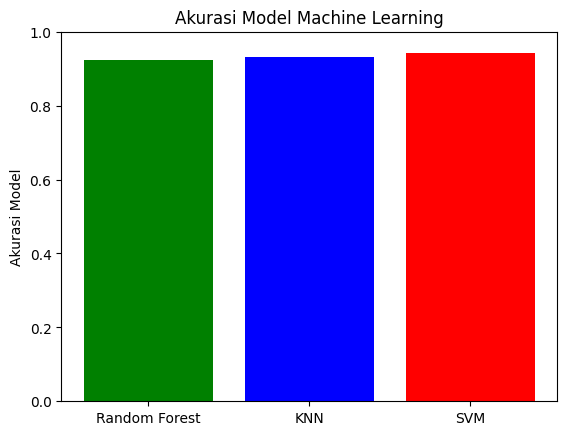

In [67]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'KNN', 'SVM']
accuracies = [accuracy_rf, accuracy_knn, accuracy_svm ]

plt.bar(models, accuracies, color=[ 'green', 'blue', 'red'])
plt.ylabel('Akurasi Model')
plt.title('Akurasi Model Machine Learning')
plt.ylim(0, 1)  # Sesuaikan dengan rentang akurasi (0-1)
plt.show()

In [71]:
import joblib

In [73]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer')

['tfidf_vectorizer']

In [76]:
joblib.dump(rf, 'rf_model')

['rf_model']